In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/train.csv
/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-2/train.csv")
train_data.head()


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [3]:
test_data=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-2/test.csv")
test_data.head()


,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [4]:
submission=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-2/submission.csv")
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 6 columns):
Id                19404 non-null int64
Province_State    8250 non-null object
Country_Region    19404 non-null object
Date              19404 non-null object
ConfirmedCases    19404 non-null float64
Fatalities        19404 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 909.7+ KB


In [6]:
train_data.describe()

,Id,ConfirmedCases,Fatalities
count,19404.000000,19404.000000,19404.000000
mean,14683.500000,390.558029,14.925067
std,8487.239944,3831.235197,211.282409
min,1.000000,0.000000,0.000000
25%,7333.750000,0.000000,0.000000
50%,14683.500000,0.000000,0.000000
75%,22033.250000,18.000000,0.000000
max,29366.000000,86498.000000,9134.000000


In [7]:
#country=train_data['Country_Region'].isnull().sum()
state=train_data['Province_State'].isnull().sum()
#Date=train_data['Date'].isnull().sum()
#ConfirmedCases=train_data['ConfirmedCases'].isnull().sum()
#Fatalities=train_data['Fatalities'].isnull().sum()
#print(country)





In [8]:
X=train_data.iloc[:,0:4]
Y1=train_data.iloc[:,4:5]
Y2=train_data.iloc[:,5:6]
print(Y1)


       ConfirmedCases
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
...               ...
19399             3.0
19400             3.0
19401             3.0
19402             3.0
19403             5.0

[19404 rows x 1 columns]


Country wise Total Fatilies & Total Confirmed Cases List as below:

In [9]:
#train_data=train_data.loc[(train_data!=0).any(axis=1)]
#train_data.loc[(train_data['ConfirmedCases']!=0).any(axis=1)]
#train_data = train_data.dropna(how='0', axis=0)


train_data= train_data[train_data['Fatalities'] != 0 ]
#train_data.shape()

x1=train_data[['Country_Region', 'ConfirmedCases','Fatalities']].groupby(['Country_Region'], as_index=False).sum().sort_values(by='Country_Region', ascending=True)
print(x1)


           Country_Region  ConfirmedCases  Fatalities
0             Afghanistan           442.0        13.0
1                 Albania          1345.0        45.0
2                 Algeria          2412.0       185.0
3                 Andorra          1089.0        10.0
4               Argentina          3207.0        71.0
..                    ...             ...         ...
102  United Arab Emirates          1963.0        16.0
103        United Kingdom         79603.0      3666.0
104            Uzbekistan            88.0         1.0
105             Venezuela           107.0         1.0
106              Zimbabwe            17.0         5.0

[107 rows x 3 columns]


> bargraph of confirmed Case vs Country Region

107

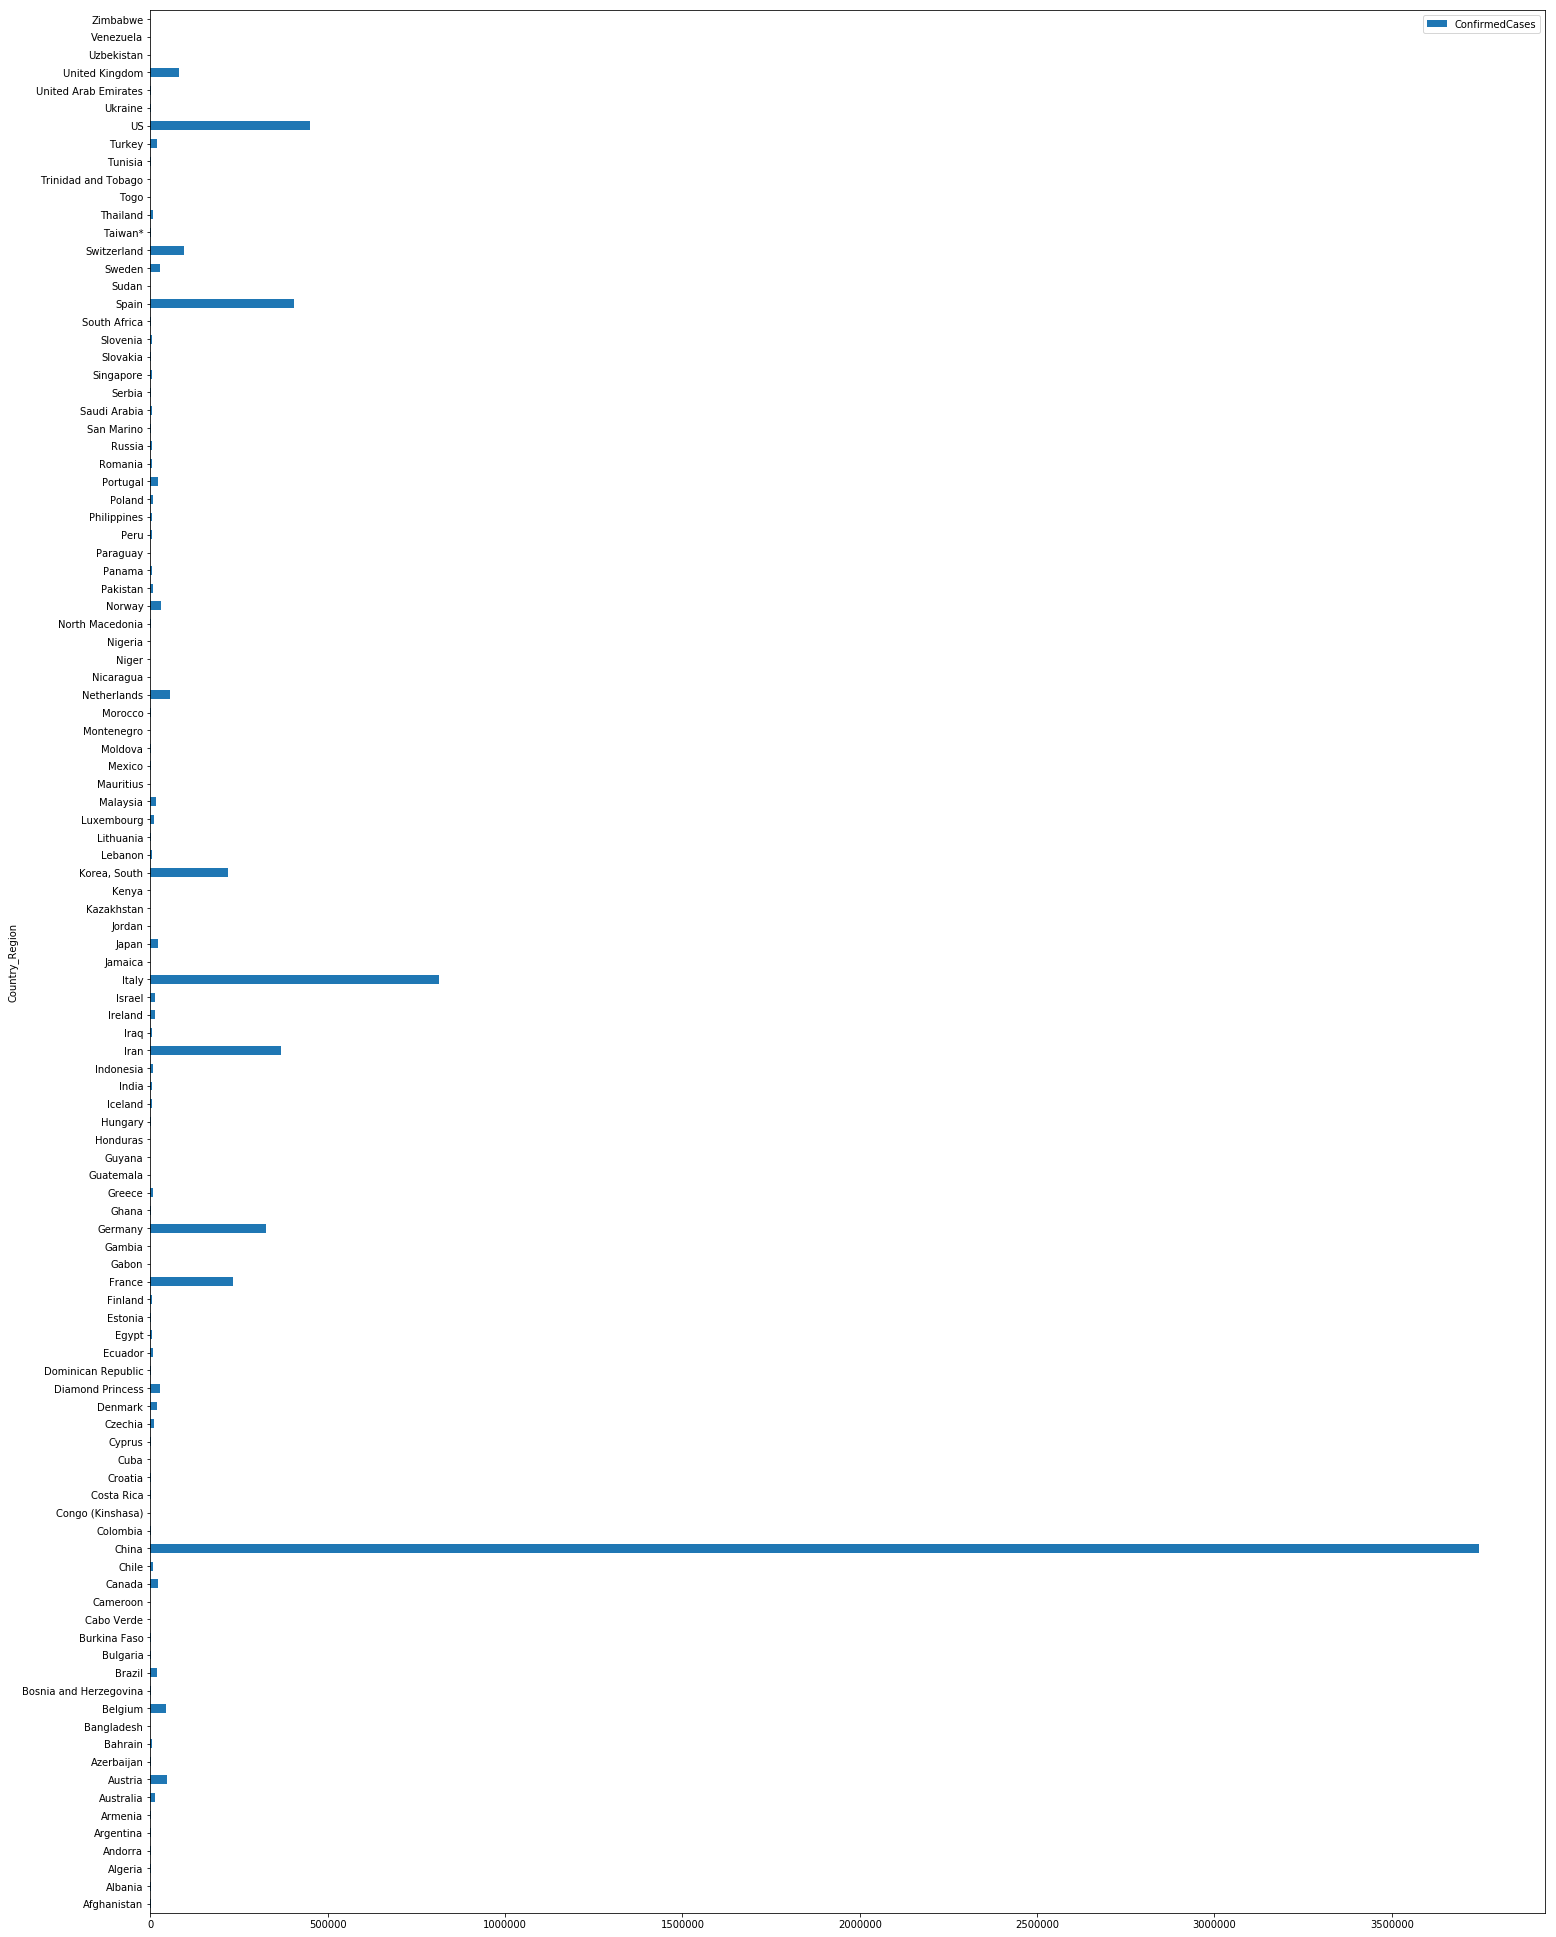

In [10]:

X=x1.plot.barh(y='ConfirmedCases',x='Country_Region',figsize = (25,35))
x1['Country_Region'].count()



bargraph for Fatalities******** vs Country Region

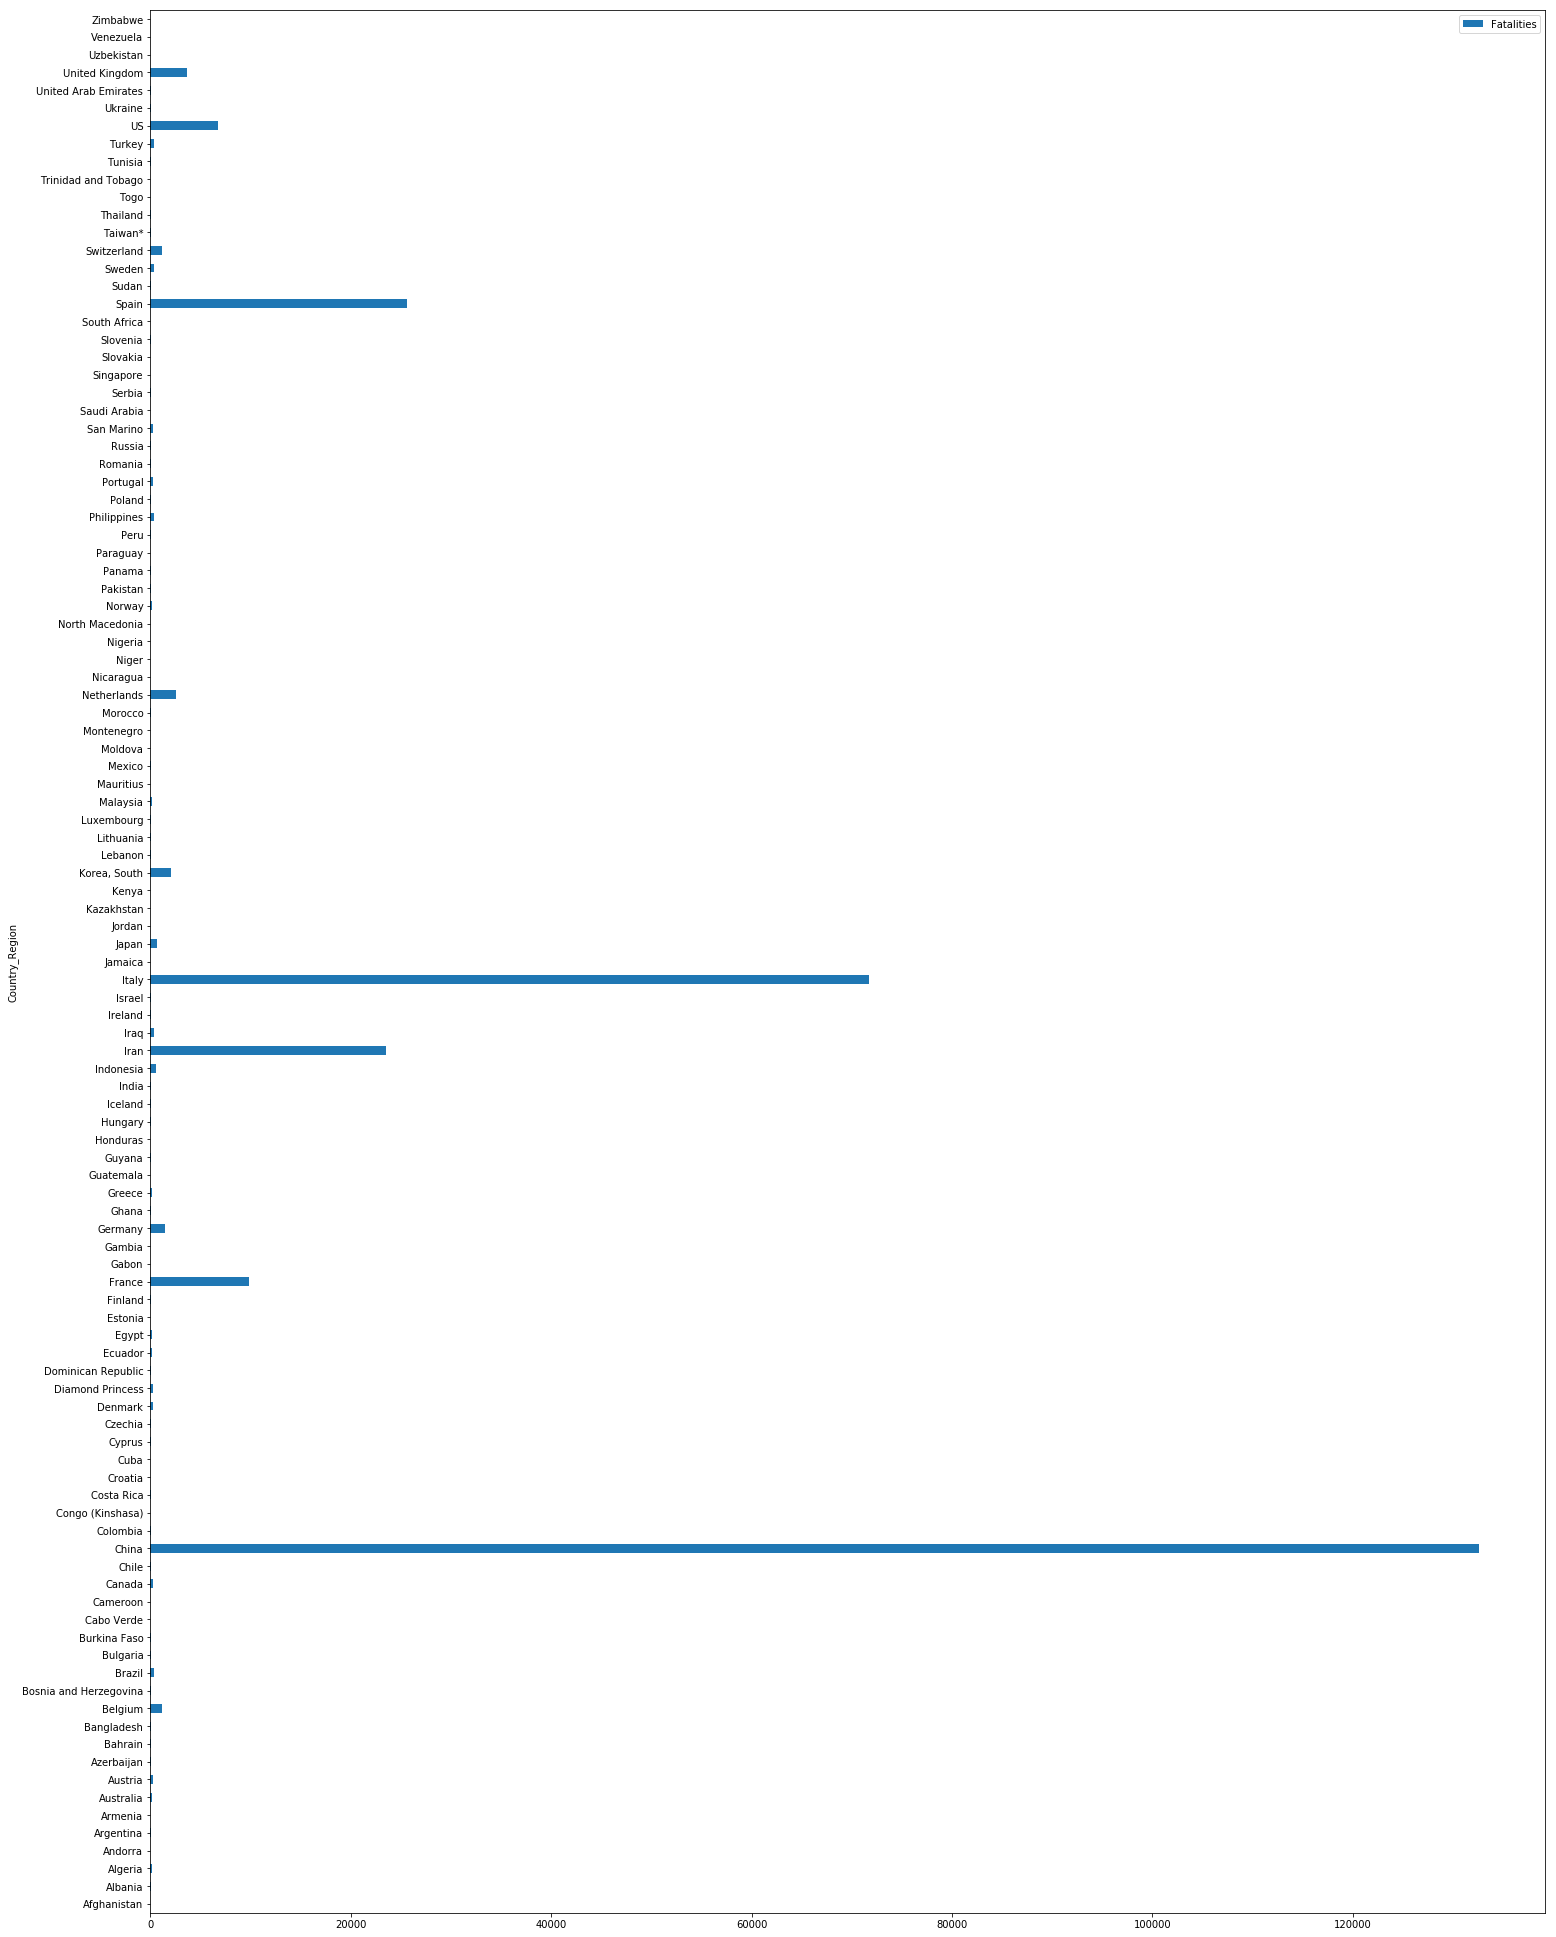

In [11]:
X=x1.plot.barh(y='Fatalities',x='Country_Region',figsize = (25,35))


Date & Country wise confirmed case & Fatiliies.

In [12]:
train_data[['Date' ,'Country_Region','ConfirmedCases','Fatalities']].groupby(['Date','Country_Region'], as_index=True).sum().sort_values(by='Date', ascending=True)

ConfirmedCases  Fatalities
Date       Country_Region                              
2020-01-22 China                      444.0        17.0
2020-01-23 China                      445.0        18.0
2020-01-24 China                      555.0        26.0
2020-01-25 China                      778.0        42.0
2020-01-26 China                     1209.0        56.0
...                                     ...         ...
2020-03-27 Diamond Princess           712.0        10.0
           Czechia                   2279.0         9.0
           Cyprus                     162.0         5.0
           Croatia                    586.0         3.0
           Zimbabwe                     5.0         1.0

[1464 rows x 2 columns]

China confirmed case date Wise

Date Wise China Confirmed Cases 

In [13]:
confirmed_China = train_data[train_data['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
print(confirmed_China)

           ConfirmedCases
                      sum
Date                     
2020-01-22          444.0
2020-01-23          445.0
2020-01-24          555.0
2020-01-25          778.0
2020-01-26         1209.0
...                   ...
2020-03-23        80613.0
2020-03-24        80702.0
2020-03-25        80765.0
2020-03-26        80882.0
2020-03-27        80994.0

[66 rows x 1 columns]


In [14]:
Fatilities_China = train_data[train_data['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
print(Fatilities_China)

           Fatalities
                  sum
Date                 
2020-01-22       17.0
2020-01-23       18.0
2020-01-24       26.0
2020-01-25       42.0
2020-01-26       56.0
...               ...
2020-03-23     3274.0
2020-03-24     3281.0
2020-03-25     3285.0
2020-03-26     3291.0
2020-03-27     3296.0

[66 rows x 1 columns]


Confirmed vs Fatilitis Graph of China

Text(0.5, 0, 'Date')

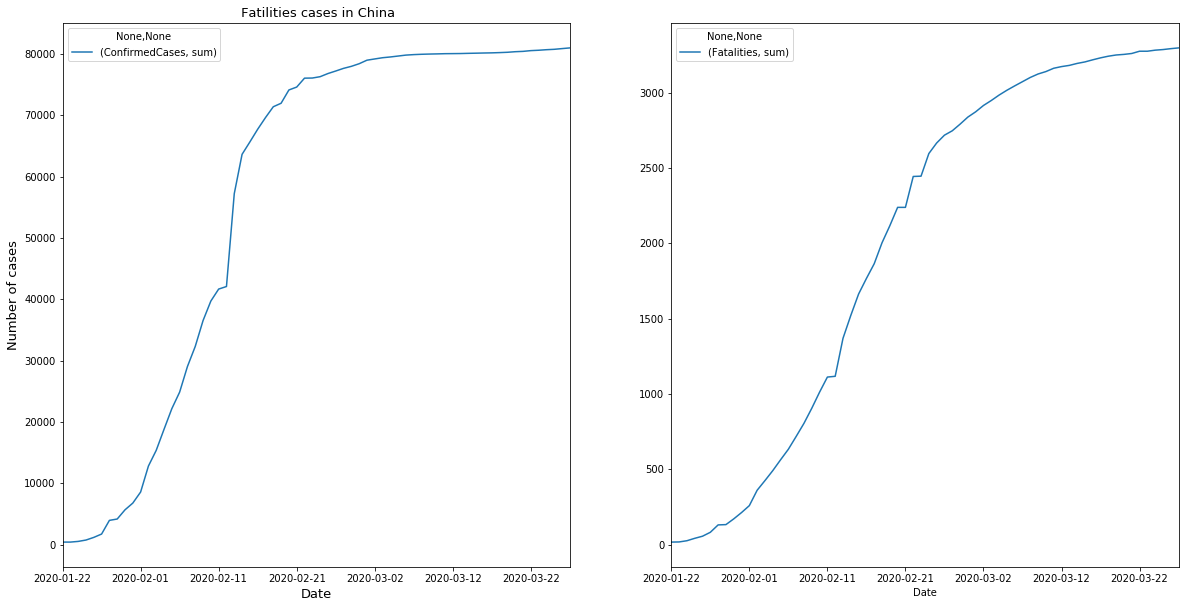

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
confirmed_China.plot(ax=ax1)
ax1.set_title(" confirmed cases in China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

Fatilities_China.plot(ax=ax2)
ax1.set_title(" Fatilities cases in China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

 Italy,Spain,UK,France,Iran,Singapore Confirm Case vs Fatilities Date wise

In [16]:
Confirmed_Itly = train_data[train_data['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_Itly = train_data[train_data['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = Confirmed_Itly.join(Fatilities_Itly)

Confirmed_spain = train_data[train_data['Country_Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_spain = train_data[train_data['Country_Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_spain = Confirmed_spain.join(Fatilities_spain)

Confirmed_UK = train_data[train_data['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_UK = train_data[train_data['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = Confirmed_UK.join(Fatilities_UK)

Confirmed_Iran = train_data[train_data['Country_Region']=='Iran'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_Iran = train_data[train_data['Country_Region']=='Iran'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Iran = Confirmed_Iran.join(Fatilities_Iran)

Confirmed_France = train_data[train_data['Country_Region']=='France'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_France = train_data[train_data['Country_Region']=='France'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_France = Confirmed_France.join(Fatilities_France)

Confirmed_singapore = train_data[train_data['Country_Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
Fatilities_singapore = train_data[train_data['Country_Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_singapore = Confirmed_singapore.join(Fatilities_singapore)

Plot Graph for Italy Confirmed Cases vs Fatilities

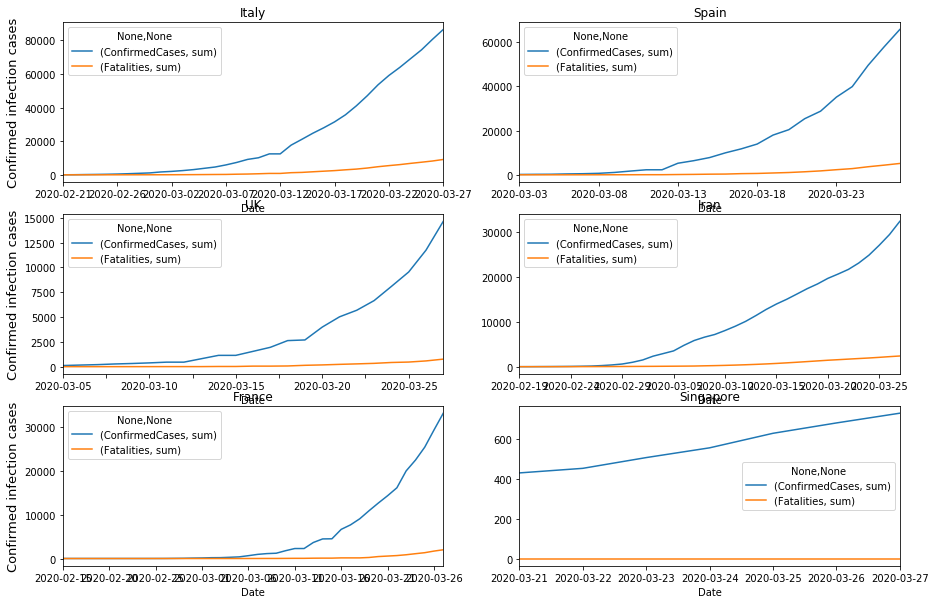

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(3, 2, 2)
total_date_spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(3, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='UK')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(3, 2, 4)
total_date_Iran.plot(ax=plt.gca(), title='Iran')

plt.subplot(3, 2, 5)
total_date_France.plot(ax=plt.gca(), title='France')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(3, 2, 6)
total_date_singapore.plot(ax=plt.gca(), title='Singapore')

In order to compare the 4 countries, it's also interesting to see the evolution of the infections from the first confirmed case:

In [18]:
confirmed_total_date_Italy = train_data[(train_data['Country_Region']=='Italy') & train_data['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train_data[(train_data['Country_Region']=='Italy') & train_data['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

confirmed_total_date_Spain = train_data[(train_data['Country_Region']=='Spain') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train_data[(train_data['Country_Region']=='Spain') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

confirmed_total_date_UK = train_data[(train_data['Country_Region']=='United Kingdom') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train_data[(train_data['Country_Region']=='United Kingdom') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

confirmed_total_date_Australia = train_data[(train_data['Country_Region']=='Australia') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Australia = train_data[(train_data['Country_Region']=='Australia') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

confirmed_total_date_Singapore = train_data[(train_data['Country_Region']=='Singapore') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train_data[(train_data['Country_Region']=='Singapore') & (train_data['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

italy = [i for i in total_date_Italy.ConfirmedCases['sum'].values]
italy_30 = italy[0:50] 
spain = [i for i in total_date_Spain.ConfirmedCases['sum'].values]
spain_30 = spain[0:50] 
UK = [i for i in total_date_UK.ConfirmedCases['sum'].values]
UK_30 = UK[0:50] 
singapore = [i for i in total_date_Singapore.ConfirmedCases['sum'].values]
singapore_30 = singapore[0:50] 




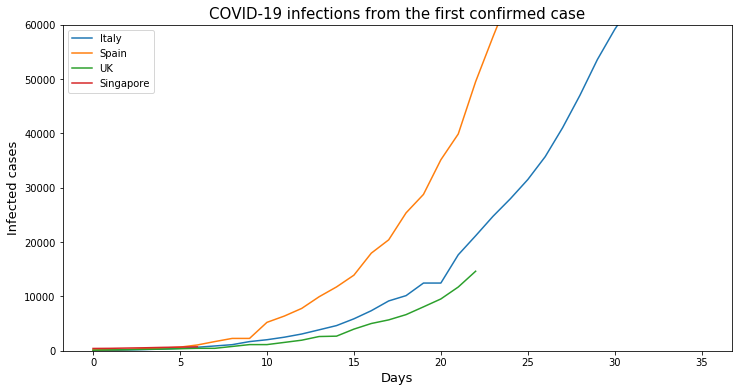

In [19]:
plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.legend(["Italy", "Spain", "UK", "Singapore"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 60000)
plt.show()